In [1]:
import pandas as pd
import xml.etree.ElementTree as xet

In [2]:
from glob import glob

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/data-test/005 images-labeled.zip", "r") as zip_refer:
  zip_refer.extractall("/content/drive/MyDrive/data-test/")


In [5]:
files = glob("/content/drive/MyDrive/data-test/images_labeled/*.xml")
print(files)

['/content/drive/MyDrive/data-test/images_labeled/N1.xml', '/content/drive/MyDrive/data-test/images_labeled/N100.xml', '/content/drive/MyDrive/data-test/images_labeled/N101.xml', '/content/drive/MyDrive/data-test/images_labeled/N102.xml', '/content/drive/MyDrive/data-test/images_labeled/N103.xml', '/content/drive/MyDrive/data-test/images_labeled/N104.xml', '/content/drive/MyDrive/data-test/images_labeled/N105.xml', '/content/drive/MyDrive/data-test/images_labeled/N106.xml', '/content/drive/MyDrive/data-test/images_labeled/N107.xml', '/content/drive/MyDrive/data-test/images_labeled/N108.xml', '/content/drive/MyDrive/data-test/images_labeled/N109.xml', '/content/drive/MyDrive/data-test/images_labeled/N11.xml', '/content/drive/MyDrive/data-test/images_labeled/N110.xml', '/content/drive/MyDrive/data-test/images_labeled/N111.xml', '/content/drive/MyDrive/data-test/images_labeled/N112.xml', '/content/drive/MyDrive/data-test/images_labeled/N113.xml', '/content/drive/MyDrive/data-test/images_l

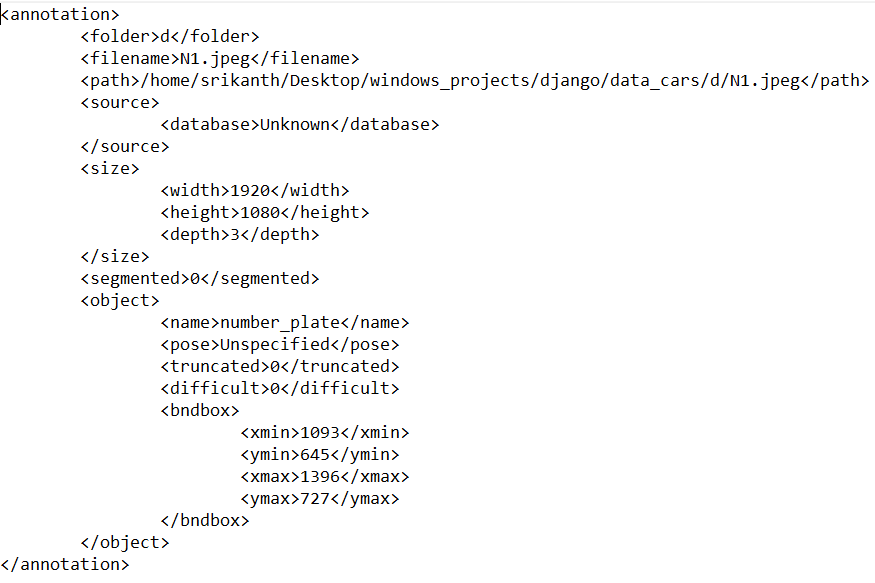

tab ---> space

shift+tab ---> back space

In [15]:
 labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[]) #create a dictionary
 for   filename in files:
   # filename = files[0]
    info = xet.parse(filename) # accsese to root of filename
    root = info.getroot() # get root
    member_object = root.find('object') #get object root
    labels_object = member_object.find('bndbox') #from object root get bndbox root
    xmin = int(labels_object.find('xmin').text)
    ymin = int(labels_object.find('ymin').text)
    xmax = int(labels_object.find('xmax').text)
    ymax = int(labels_object.find('ymax').text)
    #print(ymax)
    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

In [18]:
print(labels_dict['ymax'])

[727, 350, 161, 243, 724, 197, 195, 290, 287, 257, 320, 144, 227, 402, 290, 157, 126, 278, 202, 706, 314, 754, 387, 370, 288, 165, 324, 327, 245, 271, 402, 213, 143, 286, 840, 219, 247, 513, 493, 168, 1011, 756, 221, 296, 259, 296, 275, 151, 591, 293, 148, 691, 143, 252, 347, 385, 196, 201, 249, 292, 696, 217, 209, 231, 174, 335, 295, 416, 561, 263, 556, 386, 270, 184, 243, 531, 229, 358, 317, 351, 240, 408, 432, 190, 660, 484, 344, 535, 832, 181, 423, 969, 397, 461, 59, 232, 111, 130, 169, 255, 1882, 814, 293, 229, 296, 905, 334, 203, 147, 307, 221, 244, 258, 254, 175, 173, 153, 226, 446, 371, 468, 238, 154, 967, 273, 182, 156, 183, 247, 1101, 304, 359, 540, 288, 384, 319, 258, 50, 183, 391, 141, 198, 170, 276, 224, 137, 385, 227, 343, 319, 321, 578, 281, 193, 677, 722, 462, 606, 261, 206, 751, 596, 378, 213, 290, 641, 1607, 254, 327, 327, 322, 180, 234, 259, 303, 173, 762, 291, 248, 294, 188, 188, 303, 202, 231, 1269, 676, 297, 232, 218, 314, 680, 280, 195, 295, 549, 702, 430, 212, 1

In [20]:
df =pd.DataFrame(labels_dict) #create dataframe

In [21]:
df

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/data-test/images_labele...,1093,1396,645,727
1,/content/drive/MyDrive/data-test/images_labele...,134,301,312,350
2,/content/drive/MyDrive/data-test/images_labele...,31,139,128,161
3,/content/drive/MyDrive/data-test/images_labele...,164,316,216,243
4,/content/drive/MyDrive/data-test/images_labele...,813,1067,665,724
...,...,...,...,...,...
220,/content/drive/MyDrive/data-test/images_labele...,23,408,173,391
221,/content/drive/MyDrive/data-test/images_labele...,137,352,141,186
222,/content/drive/MyDrive/data-test/images_labele...,175,290,228,255
223,/content/drive/MyDrive/data-test/images_labele...,563,675,207,238


In [22]:
df.to_csv('labels.csv',index=False) #save datafrme with csv format